<h1>Geographic Visualization<h1>

1. Import Data & Libraries
2. Data Wrangling & Cleaning
3. Plotting a Choropleth
4. Results

<h3>Import Data & Libraries<h3>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
import plotly
import plotly.express as px

In [3]:
#propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [4]:
#import ".json" file for the World. 

world_geo = r'/Users/bentley/Documents/Documents - Bentley I/Bentley/Portfolio/Hausverkäufe/02 Data/Original Data/us-states.json'

In [5]:
# Checking the JSON file contents:

f = open(r'/Users/bentley/Documents/Documents - Bentley I/Bentley/Portfolio/Hausverkäufe/02 Data/Original Data/us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [6]:
#read the csv file into dataframe

houses=pd.read_csv('/Users/bentley/Documents/Documents - Bentley I/Bentley/Portfolio/Hausverkäufe/02 Data/Prepared Data/houses_data_clean.csv')

In [7]:
houses.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,98178,47.5112,-122.257
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,98125,47.7210,-122.319
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,98028,47.7379,-122.233
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,98136,47.5208,-122.393
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,98074,47.6168,-122.045


In [8]:
houses.shape

(21612, 17)

<h3>Data Wrangling & Cleaning<h3>

In [9]:
houses.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'yr_built', 'zipcode', 'lat', 'long'],
      dtype='object')

What would I like to view?

- Fluctuations in daily average house prices

- Average house prices according to zipcode

In [10]:
#create a list of necessary columns
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'zipcode', 'lat', 'long']

In [12]:
#create a subset
houses_geo = houses[columns]

In [13]:
houses_geo.shape

(21612, 14)

In [14]:
houses_geo.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,98074,47.6168,-122.045


<h3>Data Consistency Checks<h3>

Missing values check

In [15]:
#check for missing values
houses_geo.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
view           0
condition      0
grade          0
yr_built       0
zipcode        0
lat            0
long           0
dtype: int64

Duplicate Check

In [16]:
#check for full duplicates
houses_geo_dups = houses_geo[houses_geo.duplicated()]

In [17]:
houses_geo_dups

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
3951,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,1936,98074,47.6499,-122.088
4352,259950.0,2,2.00,1070,649,2.0,0,0,3,9,2008,98106,47.5213,-122.357
14983,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2001,98006,47.5443,-122.172
20053,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,2009,98027,47.5644,-122.093
20523,529500.0,3,2.25,1410,905,3.0,0,0,3,9,2014,98116,47.5818,-122.402


In [18]:
#create new houses_geo_nd without duplicates
houses_geo_nd = houses_geo.drop_duplicates()

In [19]:
houses_geo_nd.shape

(21607, 14)

Extreme Values Check

/Users/bentley/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bentley/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

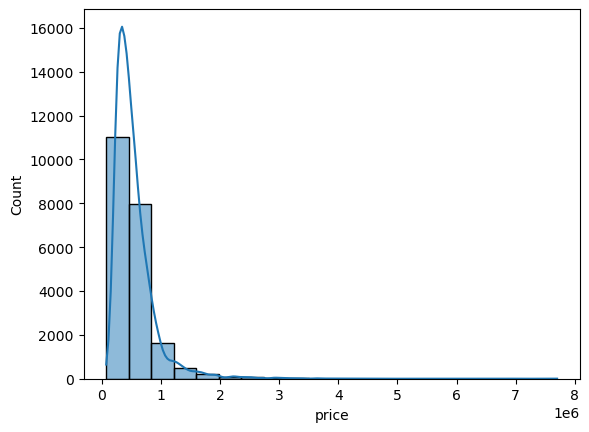

In [20]:
sns.histplot(houses_geo_nd['price'], bins=20, kde = True) # shows extreme values for 'price'

In [21]:
#check how many extreme values

houses_geo_nd[houses_geo_nd['price'] >1000000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,2001,98053,47.6561,-122.005
21,2000000.0,3,2.75,3050,44867,1.0,0,4,3,9,1968,98040,47.5316,-122.233
49,1350000.0,3,2.50,2753,65005,1.0,1,2,5,9,1953,98070,47.4041,-122.451
69,1325000.0,5,2.25,3200,20158,1.0,0,0,3,8,1965,98004,47.6303,-122.215
70,1040000.0,5,3.25,4770,50094,1.0,0,0,4,11,1973,98005,47.6525,-122.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21589,1222500.0,4,3.50,4910,9444,1.5,0,0,3,11,2007,98074,47.6502,-122.066
21592,1088000.0,5,3.75,4170,8142,2.0,0,2,3,10,2006,98056,47.5354,-122.181
21596,1575000.0,4,3.25,3410,10125,2.0,0,0,3,10,2007,98040,47.5653,-122.223
21599,1537000.0,5,3.75,4470,8088,2.0,0,0,3,11,2008,98004,47.6321,-122.200


/Users/bentley/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bentley/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bedrooms', ylabel='Count'>

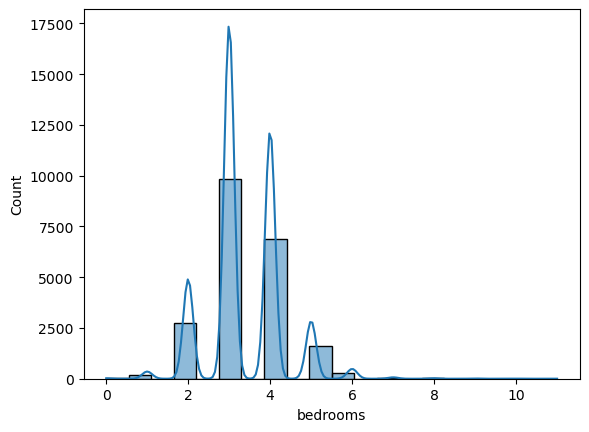

In [22]:
sns.histplot(houses_geo_nd['bedrooms'], bins=20, kde = True)

In [24]:
#check how many extreme values
houses_geo_nd[houses_geo_nd['bedrooms'] >8] #Value 6 picked. 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
4096,599999.0,9,4.50,3830,6988,2.5,0,0,3,7,1938,98103,47.6927,-122.338
4235,700000.0,9,3.00,3680,4400,2.0,0,0,3,7,1908,98102,47.6374,-122.324
6079,1280000.0,9,4.50,3650,5000,2.0,0,0,3,8,1915,98105,47.6604,-122.289
8546,450000.0,9,7.50,4050,6504,2.0,0,0,3,7,1996,98144,47.5923,-122.301
8757,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,1918,98106,47.5560,-122.363
13314,1148000.0,10,5.25,4590,10920,1.0,0,2,3,9,2008,98004,47.5861,-122.113
15161,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,1958,98006,47.5705,-122.175
16843,1400000.0,9,4.00,4620,5508,2.5,0,0,3,11,1915,98105,47.6684,-122.309
18442,934000.0,9,3.00,2820,4480,2.0,0,0,3,7,1918,98105,47.6654,-122.307
19253,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1913,98105,47.6635,-122.320


In [25]:
houses_geo_nd.shape

(21607, 14)

<h3>Create Choropleth Maps<h3>

Choroplath map of length of stay of each country

In [26]:
#finding average price of houses in each zipcode
houses_zipcode = houses_geo_nd.groupby(['zipcode'], as_index=False)['price'].mean()
houses_zipcode.head()

,zipcode,price
0,98001,2.808047e+05
1,98002,2.342840e+05
2,98003,2.941113e+05
3,98004,1.355927e+06
4,98005,8.101649e+05


In [27]:
#setup a folium map at a high-level zoom
map03 = folium.Map(location = [37, -97], zoom_start = 3.5)

#choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = world_geo,
    data = houses_zipcode,
    columns = ['zipcode', 'price'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrRd', fill_opacity=.75, line_opacity=0.1,
    nan_fill_color = 'white',
    legend_name = "Price of House by Zipcode").add_to(map03)
folium.LayerControl().add_to(map03)

map03

Choropleth map for Square Feet by Zipcode

In [34]:
#finding average square feet in each zipcode
houses_sqft = houses_geo_nd.groupby(['zipcode'], as_index=False)['sqft_living'].mean()
houses_sqft.head()

,zipcode,sqft_living
0,98001,1900.856354
1,98002,1627.743719
2,98003,1928.882143
3,98004,2909.022082
4,98005,2656.803571


In [33]:
#setup a folium map at a high-level zoom
map03 = folium.Map(location = [37, -97], zoom_start = 3.5)

#choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = world_geo,
    data = houses_sqft,
    columns = ['zipcode', 'sqft_living'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlGn', fill_opacity=.75, line_opacity=0.1,
    nan_fill_color = 'white',
    legend_name = "Square feet by Zipcode").add_to(map03)
folium.LayerControl().add_to(map03)

map03

In [37]:
#finding count of house numbers by zipcode
houses_numbers = houses_geo_nd.groupby(['zipcode'], as_index=False)['yr_built'].count()
houses_numbers.head(10)

,zipcode,yr_built
0,98001,362
1,98002,199
2,98003,280
3,98004,317
4,98005,168
5,98006,497
6,98007,141
7,98008,283
8,98010,100
9,98011,195


In [40]:
#setup a folium map at a high-level zoom
map03 = folium.Map(location = [37, -97], zoom_start = 3.5)

#choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = world_geo,
    data = houses_numbers,
    columns = ['zipcode', 'yr_built'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlGn', fill_opacity=.75, line_opacity=0.1,
    nan_fill_color = 'white',
    legend_name = "House Numbers by Zipcode").add_to(map03)
folium.LayerControl().add_to(map03)

map03

<h3>Results<h3>

**Map by average price by zipcode:**
231K - 2.1 Million 

**Map for square feet by zipcode:**
380 - 13K

**Map for houses numbers by zipcode:**
50 -601

